### 목표
- 버섯의 특징을 활용해 독/식용 이진 분류해보자
- Decision Tree 모델 활용해보자
- Decision Tree 학습현황 시각화 & 과대적합 제어(하이퍼 파라미터 튜닝)
- 특성의 중요도를 파악 확인하기( 지니불순도를 이용하여, 불순한 정도를 파악)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#train, test 랜덤샘플링 도구
from sklearn.model_selection import train_test_split
#knn 모델 from sklearn,neighbors import KNeighborsClassifies
#tree 분류 모델
from sklearn.tree import DecisionTreeClassifier

In [7]:
#생략된 컬럼을 다 보이게 하는 방법
pd.options.display.max_columns = None
# pd.set_option('display.max_columns',None)

# data 변수에 담아주기
data = pd.read_csv('./data/mushroom.csv')

#정보 확인
#data.info() #데이터 타입 : object., 결측치 없음 


In [8]:
data 
# stalk_root : ? 데이터가 들어있다.
# 모든 컬럼에는 문자열 데이터만 들어있다.

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


### 데이터 전처리 및 탐색
- 문제(특성)와 답(레이블) 분리
- X, y 간단한 통계량 확인
- 머신러닝 모델은 숫자만을 인식할 수 있음 : 문자 -> 숫자 변환
- 훈련셋, 테스트셋 분리

In [9]:
#정보 확인
data.info() #데이터 타입 : object., 결측치 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
# 문제(특성)와 답(레이블) 분리
# drop 함수

X = data.drop('poisonous', axis=1) #X = data.iloc[:,1:]
y = data['poisonous']

In [11]:
# 통계량 확인해보기
# describe()
X.describe()

# count: 갯수, unique : 타입수, top: 최대값(갯수가 많은 값)
# 문자 데이터(범주 데이터) 에 대한 통계는 최빈값(freq), 유니크한값을 표현해 준다.

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
# y 클래스(카테고리) 개수 확인
# 클래스의 다양성이 유지되는지 확
y.value_counts()

# 식용 버섯에 대한 클래스가 300 여개 정도 더 많은 상황

e    4208
p    3916
Name: poisonous, dtype: int64

-문자 > 숫자 : encodin(인코딩)
 - 데이터 값의 크고 작음의 의미가 없을 때 : 원 핫 인코딩
 - 데이터 값 크고 작음의 의미가 있을 때 : 레이블 인코딩

In [13]:
#X_one_hot = pd.get_dummies(인코딩 대상)
X_one_hot = pd.get_dummies(X)
X_one_hot

#크기확인
print(X.shape)
print(X_one_hot.shape)

(8124, 22)
(8124, 117)


In [14]:
# 훈련셋, 테스트셋 분리
# 7:3
# 랜덤 스테이트 7

X_train, X_test, y_train, y_test = train_test_split(X_one_hot,y,test_size=0.3, random_state=7)

# 크기확인
print('훈련용 셋 : ', X_train.shape, y_train.shape)
print('테스트용 셋 : ', X_test.shape, y_test.shape)

훈련용 셋 :  (5686, 117) (5686,)
테스트용 셋 :  (2438, 117) (2438,)


### 모델링
- 모델 생성
- 모델 학습
- 교차 검증
- 모델 예측 및 평가
- 특성의 중요도 확인
- 학습 현황 시각화(tree-white box)
- 과대 적합을 제어하는 파라미터 연결

In [15]:
# 모델생성
# 하이퍼 파라미터를 별도 정의 x - 기본값으로 연결
# tree_model 변수에 모델 생성
tree_model = DecisionTreeClassifier()

In [16]:
# 모델학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
#교차검증 : 모델의 일반화 성능 확인
#모든 데이터에 대해 모델이 얼마나 잘 맞추는지 평가,
#한 번 나눠서 평가하는 것보다 여러번 하기 때문에 더 안정적인 통계적 평가 방법
# 훈련세트와 테스트세트로 여러번 나눠서 평가
# 진행시점 : 모델을 생성하고 학습하기 전에도 진행 가능

In [17]:
# 교차검증 도구
from sklearn.model_selection import cross_val_score

In [18]:
# estimator : 예측기 -> 모델명
# X,y : 문제, 답데이터
# cv(cross validation) : 교차검증 횟수(테스트를 분리할 횟수)
# tree_model에게 X_train, y_train 활용해서 5번의 교차 검증 하겠다.
cv_result = cross_val_score(tree_model, X_train, y_train, cv=5)

print('교차검증 결과 : ', cv_result)
print('교차검증 평균 : ', cv_result.mean())

# 5번 진행한 후의 결과가 대부분 100% 성능을 내고 있다.
# 나름대로 신뢰할 만한 모델이다.
# 모델이 학습을 잘했다.
# -> 모델의 하이퍼 파라미터를 제어하지 않아도 내부 규칙 생성이 알맞게 되었다.
# p,e 인지 판단하기 위한 특성 설명이 충분했음(데이터 좋았음)
# 하이퍼 


교차검증 결과 :  [1.         1.         1.         0.99912049 1.        ]
교차검증 평균 :  0.9998240985048372


In [19]:
# test 예측
# 모델.predict(모델)
# 예측 모델(tree_model)을 사용하여, 테스트용 문제 에 대한 답을 알아본다. (예측 결과값)
pre = tree_model.predict(X_test)
pre

array(['p', 'p', 'e', ..., 'e', 'e', 'e'], dtype=object)

In [20]:
# 평가
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, pre)

#모델.score(테스트문제, 테스트답)
# 테스트 문제를 이용하여 예측한 값 pre를 이용하여, 테스트 답 데이터와 정확도 비교
tree_model.score(X_test, y_test) # accuracy 정확도

# 상황에 맞추어서 accuracy or score 사용 

1.0

### 특성 중요도
- 모델 특성 선택 확인하기
- feature importances 확인하기

In [22]:
fi = tree_model.feature_importances_
fi

array([0.00000000e+00, 7.03112501e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10578942e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.38861859e-03, 0.00000000e+00, 2.29619887e-02, 0.00000000e+00,
       0.00000000e+00, 2.50743114e-02, 0.00000000e+00, 6.08901883e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.93849405e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81454492e-01, 0.00000000e+00, 8.46965684e-02,
      

In [23]:
X_train.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [24]:
# 특성 중요도 np배열 -> df 변환하면서 컬럼명 연결하기
fi_df = pd.DataFrame(fi, index=X_train.columns, columns = ['feature importances'])
fi_df

,feature importances
cap-shape_b,0.000000
cap-shape_c,0.000703
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [25]:
fi_df.sort_values(by='feature importances', ascending=False)

,feature importances
odor_n,0.608902
stalk-root_c,0.181454
stalk-root_r,0.084697
spore-print-color_r,0.036178
odor_l,0.025074
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_b,0.000000
gill-spacing_w,0.000000


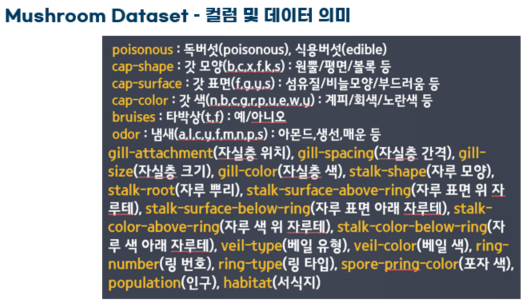

In [26]:
# 학습시킨 트리모델의 현황을 추출하는 코드
from sklearn.tree import export_graphviz
export_graphviz(tree_model, # 추출할 모델
                out_file='tree.dot', # 저장 경로 및 파일명
               class_names=['독','식용'], # 클래스 이름 표현 설정
               feature_names=X_one_hot.columns, # 컬럼명 이름 표현 설정
               impurity=False, 
               filled=True) # 색상을 채운다.

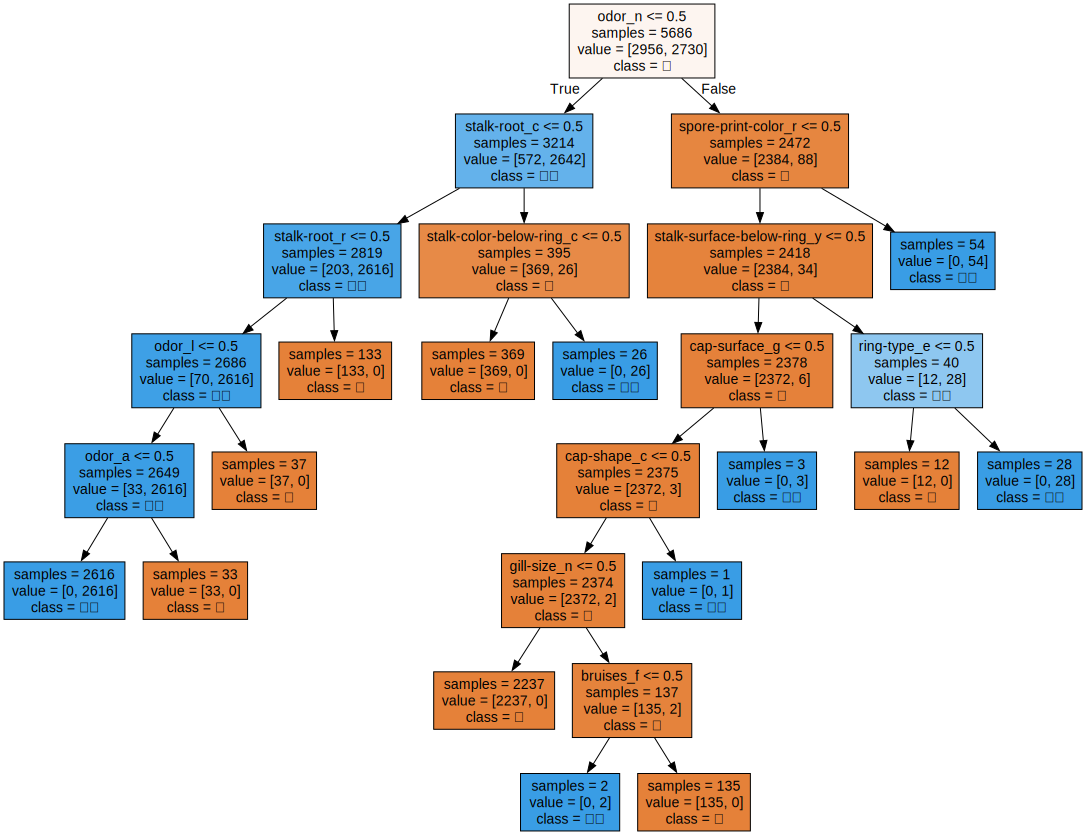

In [27]:
import graphviz
# 파일 다루는 파이썬 코드
with open('tree.dot', encoding='utf8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 과대적합 제어 후 시각화 확인
-tree 하이퍼 파라미터 종류 4가지 존재
  - max_dept : 최대 깊이
  - max_leaf_nodes : 최대 리프노트 개수(개수가 많다라는 건 깊이가 깊어진다는 뜻)
  - min_samples_split : 노드를 분할하기 위한 최소 샘플 수
  - min_samples_leat : 분리가되고 난 후의 노드의 시점
  - 종합적으로, 트리 모델의 깊이를 제어하는 파라미터

In [28]:
# 모델의 깊이를 설정하는 매개변수 연결 : max_depth
tree_model2 = DecisionTreeClassifier(max_depth = 3)
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
# q.교차검증 진행해보기
# 횟수 5, tree_model2, train 데이터로 입력

cv_result2 = cross_val_score(tree_model2, X_train, y_train, cv=5)

print('교차검증 결과 : ', cv_result2)
print('교차검증 평균 : ', cv_result2.mean())

교차검증 결과 :  [0.98242531 0.98680739 0.98504837 0.97977133 0.98592788]
교차검증 평균 :  0.9839960553548712


In [30]:
# 학습시킨 트리모델의 현황을 추출하는 코드
from sklearn.tree import export_graphviz
export_graphviz(tree_model2, # 추출할 모델
                out_file='tree.dot', # 저장 경로 및 파일명
               class_names=['독','식용'], # 클래스 이름 표현 설정
               feature_names=X_one_hot.columns, # 컬럼명 이름 표현 설정
               impurity=False, 
               filled=True) # 색상을 채운다.

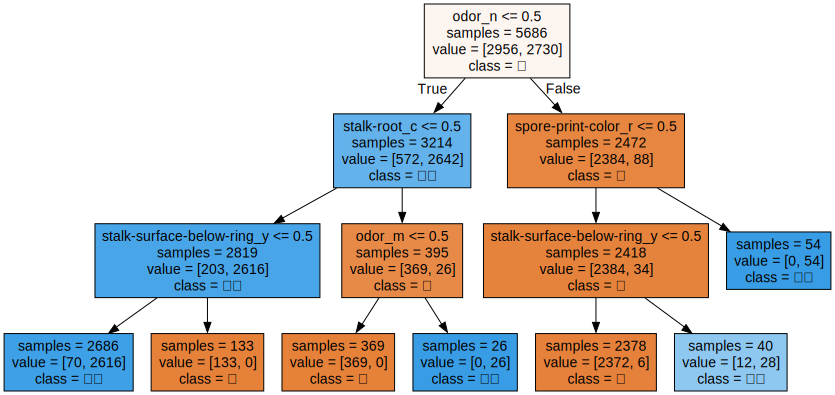

In [31]:
import graphviz
# 파일 다루는 파이썬 코드
with open('tree.dot', encoding='utf8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [ ]:
# 현재 버섯 분류하는 상황에서는 제어할 필요가 없지만
# 다른 데이터를 활용해 학습을 진행할 때에는 일반적으로
# 끝까지 학습하게 규제하지 않으면 과대적합에 걸릴 확률이 높다.